In [1]:
import os
import gc
import warnings
import numpy as np
import random
import json

from tqdm.notebook import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

from train import *
from model import *
from utils import *
from config import *

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        return json.JSONEncoder.default(self, obj)
    

def save_predicted_maps(model, model_name, dataloader_test, device, save_dir="maps", trs=0.0, dpi=150):
    save_path = os.path.join(save_dir, model_name)                    
    os.makedirs(save_path, exist_ok=True)

    target, prediction = get_target_pred(
        model, device=device,
        dataloader_test=dataloader_test,
    )

    prediction = prediction.detach().cpu().numpy()
    target = target.detach().cpu().numpy()

    for i in tqdm(range(len(prediction)), desc=f"saving predicts of {model_name}"):
        plt_path = os.path.join(save_path, f"map_{i}.png")
        plot_target_pred(target[i], prediction[i], trs=trs, save=True, savepath=plt_path, dpi=dpi)

In [3]:
seed = 10

np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)

In [4]:
print(f"PyTorch version: {torch.__version__}")
print(f"GPU available: {torch.cuda.is_available()}")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
print(f"device: {device}")

PyTorch version: 1.13.1+cu117
GPU available: True
device: cuda:0


### with aftershocks, magnitude > 3.5
input: max magnitude map

In [5]:
gc.collect()
torch.cuda.empty_cache()

initializing datasets, dataloaders, model ... 
two_maps_flag: False
self.data_x : torch.Size([6066, 1, 200, 250]) self.data_y : torch.Size([6066, 1, 200, 250])
size_x      : 6016 size_y      : 6016
self.data_x : torch.Size([1000, 1, 200, 250]) self.data_y : torch.Size([1000, 1, 200, 250])
size_x      : 950 size_y      : 950
../data/model/model_orig_magn3_5 True
model imported

validating ...


  0%|          | 0/950 [00:00<?, ?it/s]

roc auc | masked:   0%|          | 0/501 [00:00<?, ?it/s]

0.5876


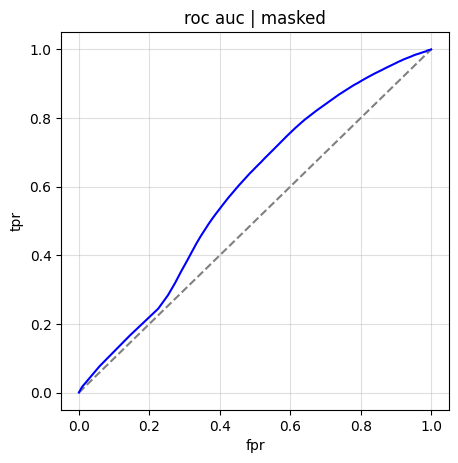

roc auc | weighted fpr:   0%|          | 0/501 [00:00<?, ?it/s]

0.5751


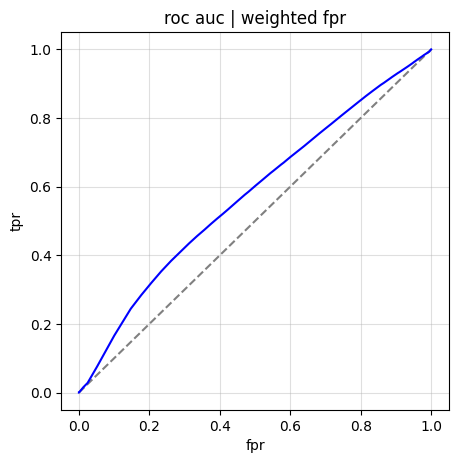

In [ ]:
orig_magn_3_5_pipe_ = pipeline(**orig_magn_3_5_params)
orig_magn_3_5_res_dict = orig_magn_3_5_pipe_()

In [23]:
orig_magn_3_5_res_dict

{'model': 'model_orig_magn3_5',
 'roc': 0.5876,
 'tpr': array([1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.000000

In [8]:
with open('fpr_tpr/lstm_orig_magn_3_5.json', 'w') as f:
    json.dump(orig_magn_3_5_res_dict, f, indent=4, cls=NumpyEncoder)

In [6]:
# save_predicted_maps(
#     model=orig_magn_3_5_pipe.model, model_name=orig_magn_3_5_pipe.model_name, 
#     dataloader_test=orig_magn_3_5_pipe.dataloader_test, 
#     device=device, save_dir="maps", trs=0.0, dpi=150
# )

### without aftershocks, magnitude > 3.5
input: original map

In [9]:
gc.collect()
torch.cuda.empty_cache()

initializing datasets, dataloaders, model ... 
two_maps_flag: False
self.data_x : torch.Size([6066, 1, 200, 250]) self.data_y : torch.Size([6066, 1, 200, 250])
size_x      : 6016 size_y      : 6016
self.data_x : torch.Size([1000, 1, 200, 250]) self.data_y : torch.Size([1000, 1, 200, 250])
size_x      : 950 size_y      : 950
../data/model/model_withoutaft_magn3_5 True
model imported

validating ...


  0%|          | 0/950 [00:00<?, ?it/s]

roc auc | masked:   0%|          | 0/501 [00:00<?, ?it/s]

0.6305


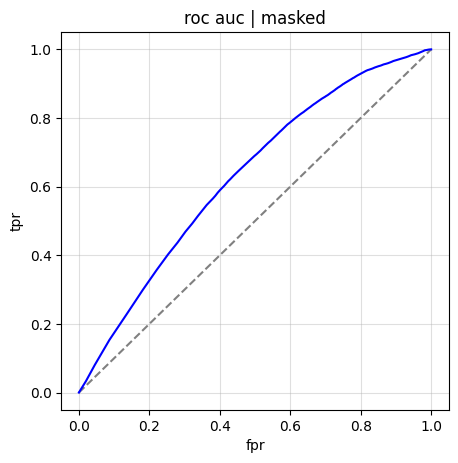

roc auc | weighted fpr:   0%|          | 0/501 [00:00<?, ?it/s]

0.6273


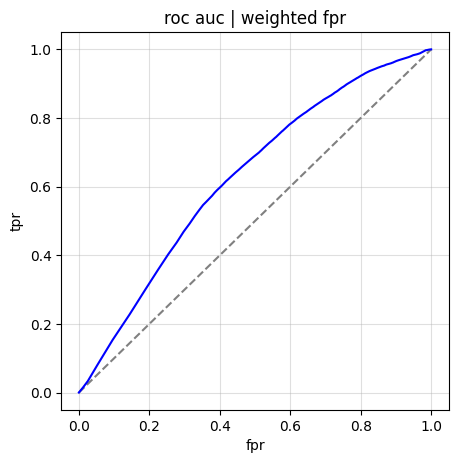

In [ ]:
without_aft_magn_3_5_pipe = pipeline(**without_aft_magn_3_5_params)
without_aft_magn_3_5_res_dict = without_aft_magn_3_5_pipe()

In [11]:
with open('fpr_tpr/lstm_withoutaft_3_5.json', 'w') as f:
    json.dump(without_aft_magn_3_5_res_dict, f, indent=4, cls=NumpyEncoder)

### with aftershocks, magnitude > 6
input: max magnitude map

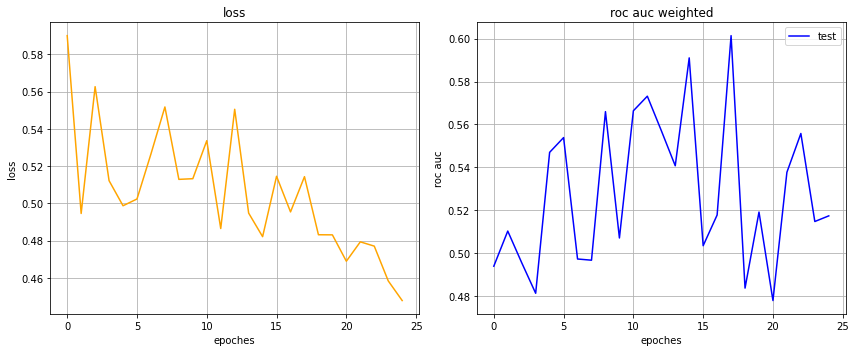

best epoch (17) with roc=0.6268026828765869, w_roc=0.6014126539230347
best epoch 17 with roc=0.6268026828765869, w_roc=0.6014126539230347

validating ...


  0%|          | 0/950 [00:00<?, ?it/s]

roc auc | masked:   0%|          | 0/501 [00:00<?, ?it/s]

0.6269


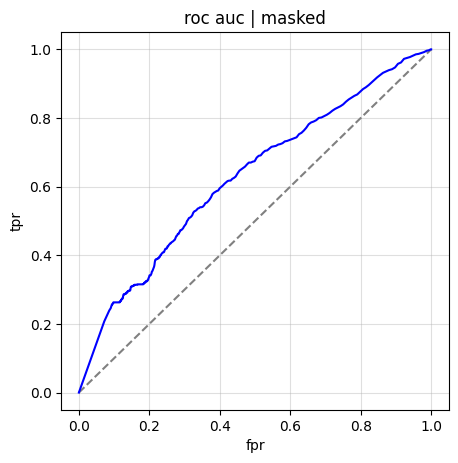

roc auc | weighted fpr:   0%|          | 0/501 [00:00<?, ?it/s]

0.6015


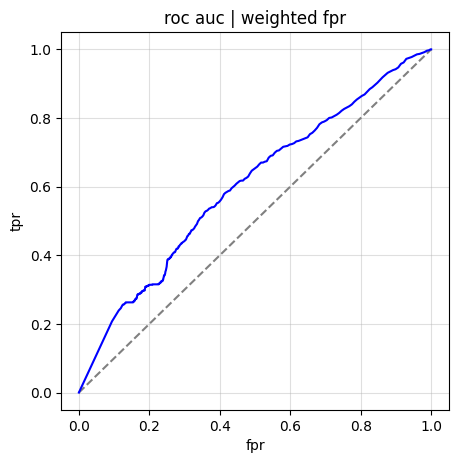

In [ ]:
gc.collect()
torch.cuda.empty_cache()

orig_magn_6_pipe_ = pipeline(**orig_magn_6_params)
orig_magn_6_res_dict = orig_magn_6_pipe_()

In [20]:
orig_magn_6_res_dict

{'model': 'model_maxmagn_Xorig_Yorig_magn6__1',
 'roc': 0.6269,
 'tpr': array([1.        , 0.9985301 , 0.9935363 , 0.98721623, 0.9797854 ,
        0.9724503 , 0.9642486 , 0.9565784 , 0.94778776, 0.9397201 ,
        0.93109703, 0.922881  , 0.91444945, 0.9057977 , 0.8975481 ,
        0.88886285, 0.88021106, 0.87164545, 0.8632522 , 0.85483986,
        0.846777  , 0.83840775, 0.83045024, 0.82289964, 0.8146884 ,
        0.8065681 , 0.798194  , 0.79007846, 0.7819725 , 0.77386177,
        0.76600003, 0.75814307, 0.7501807 , 0.7425009 , 0.7349647 ,
        0.7272897 , 0.7194854 , 0.71164757, 0.7037954 , 0.69628316,
        0.6886081 , 0.6810384 , 0.67374164, 0.66634905, 0.6592007 ,
        0.6523061 , 0.6452727 , 0.6385839 , 0.6318713 , 0.6249288 ,
        0.61784744, 0.6111683 , 0.60444605, 0.5976328 , 0.5912027 ,
        0.58454746, 0.57813644, 0.5718786 , 0.56582195, 0.5593199 ,
        0.5529376 , 0.5467947 , 0.5405561 , 0.53460467, 0.5284618 ,
        0.52241945, 0.51623344, 0.5104161 , 0

In [21]:
with open('fpr_tpr/lstm_aft_6.json', 'w') as f:
    json.dump(orig_magn_6_res_dict, f, indent=4, cls=NumpyEncoder)

### without aftershocks, magnitude > 6
input: density map + max magnitude map

In [6]:
gc.collect()
torch.cuda.empty_cache()

initializing datasets, dataloaders, model ... 
two_maps_flag: True
self.data_x : torch.Size([6066, 2, 200, 250]) self.data_y : torch.Size([6066, 1, 200, 250])
size_x      : 6016 size_y      : 6016
self.data_x : torch.Size([1000, 2, 200, 250]) self.data_y : torch.Size([1000, 1, 200, 250])
size_x      : 950 size_y      : 950
../data/model/model_withoutaft_magn6__ True
model imported

validating ...


  0%|          | 0/950 [00:00<?, ?it/s]

roc auc | masked:   0%|          | 0/501 [00:00<?, ?it/s]

0.5876


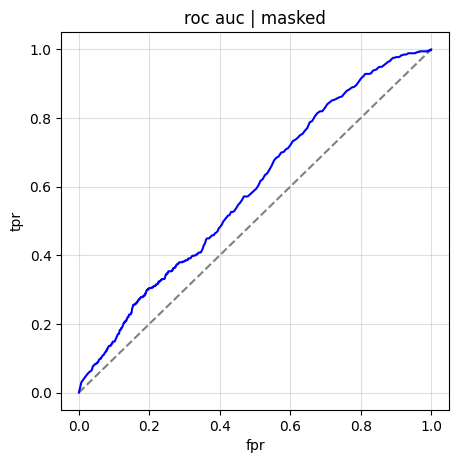

roc auc | weighted fpr:   0%|          | 0/501 [00:00<?, ?it/s]

0.6192


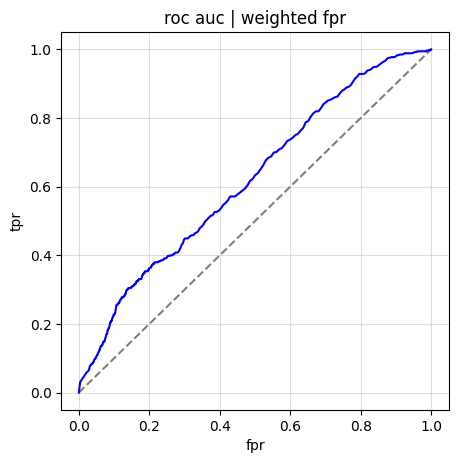

In [ ]:
gc.collect()
torch.cuda.empty_cache()

without_aft_magn_6_pipe_ = pipeline(**without_aft_magn_6_params)
without_aft_magn_6_res_dict = without_aft_magn_6_pipe_()

In [8]:
without_aft_magn_6_res_dict

{'model': 'model_withoutaft_magn6__',
 'roc': 0.5876,
 'tpr': array([1.        , 1.        , 1.        , 0.99997926, 0.9999377 ,
        0.9999273 , 0.99987537, 0.9998442 , 0.99977154, 0.9996261 ,
        0.99958456, 0.9994911 , 0.9994392 , 0.999273  , 0.99911726,
        0.9989718 , 0.9987641 , 0.9985668 , 0.9983591 , 0.99817216,
        0.99780864, 0.9974971 , 0.9972271 , 0.9968947 , 0.9966351 ,
        0.99617815, 0.9956796 , 0.99509805, 0.9945684 , 0.9940076 ,
        0.9933948 , 0.99271977, 0.9920135 , 0.9913073 , 0.9904038 ,
        0.98940676, 0.9886071 , 0.9874751 , 0.986343  , 0.98500335,
        0.9837259 , 0.98228234, 0.9809426 , 0.9796548 , 0.9781385 ,
        0.97645605, 0.97481513, 0.97302884, 0.9711283 , 0.96919656,
        0.96755564, 0.9657486 , 0.96355724, 0.96121013, 0.95901877,
        0.9567755 , 0.95440763, 0.9521747 , 0.94963026, 0.94723123,
        0.94444793, 0.9411972 , 0.9383308 , 0.9352567 , 0.93214107,
        0.9288904 , 0.92594093, 0.92240983, 0.9189411 ,

In [9]:
with open('fpr_tpr/lstm_withoutaft_6.json', 'w') as f:
    json.dump(without_aft_magn_6_res_dict, f, indent=4, cls=NumpyEncoder)

In [12]:
# save_predicted_maps(
#     model=without_aft_magn_6_pipe.model, model_name=without_aft_magn_6_pipe.model_name, 
#     dataloader_test=without_aft_magn_6_pipe.dataloader_test, 
#     device=device, save_dir="maps", trs=0.0, dpi=150
# )